### Kalman Filter applied in market beta

In [106]:
### Importing librarys
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') #### Plot style

In [107]:
### Importing data from economatica
df = pd.read_excel('C:/Users/Jhona/OneDrive - Grupo Marista/TCC/Dados (Temporário)/retornos_diarios.xlsx', skiprows=3, 
                    parse_dates=True, index_col=0)
ibov = pd.read_excel('C:/Users/Jhona/OneDrive - Grupo Marista/TCC/Dados (Temporário)/retornos_ibov.xlsx', skiprows=3, 
                    parse_dates=True, index_col=0)

##### Manipulating data

In [108]:
df.drop(index=df.index[0], axis=0, inplace=True) ### excluding the first row 
ibov.drop(index=df.index[0], axis=0, inplace=True)

In [109]:
df.replace(to_replace=['-'], value=np.nan, inplace=True) ### replace string
ibov.replace(to_replace=['-'], value=np.nan, inplace=True)

In [110]:
### Function to replace columns name
def columns(df): #renomeando colunas com as ações
    df.columns = df.columns.str[39:]
columns(df)
ibov.rename(columns={'Fechamento\najust p/ prov\nEm moeda orig': 'Ibovespa'}, inplace=True)

In [111]:
df.isnull().sum() ### counting NaN values in Data Frame

ABCB4    154
ALPA4    154
ABEV3    154
AMER3    154
B3SA3    154
        ... 
VULC3    555
WEGE3    154
WHRL4    341
PORT3    263
YDUQ3    154
Length: 135, dtype: int64

In [112]:
df.fillna(method = 'ffill', inplace=True)
ibov.fillna(method='ffill', inplace=True)

In [113]:
### Pct change assets
df_pct = df.pct_change()
df_pct.dropna(inplace=True)
df_pct = df_pct.loc[:'2022-06-30']

### Pct change iboc
ibov_pct = ibov.pct_change()
ibov_pct.dropna(inplace=True)

In [126]:
matrix = pd.concat([df_pct, ibov_pct], axis=1)

In [129]:
matrix.dropna(inplace=True)

In [130]:
obs_mat = np.expand_dims(np.vstack([[matrix['Ibovespa']], [np.ones(len(matrix['Ibovespa']))]]).T, axis=1)


In [131]:
kalman = KalmanFilter(initial_state_mean=[0,0],
                        initial_state_covariance=np.ones((2,2)),
                        transition_matrices=np.eye(2),
                        observation_matrices=obs_mat
                        )

In [147]:
state_means, state_cov = kalman.filter(matrix['Ibovespa'].values)

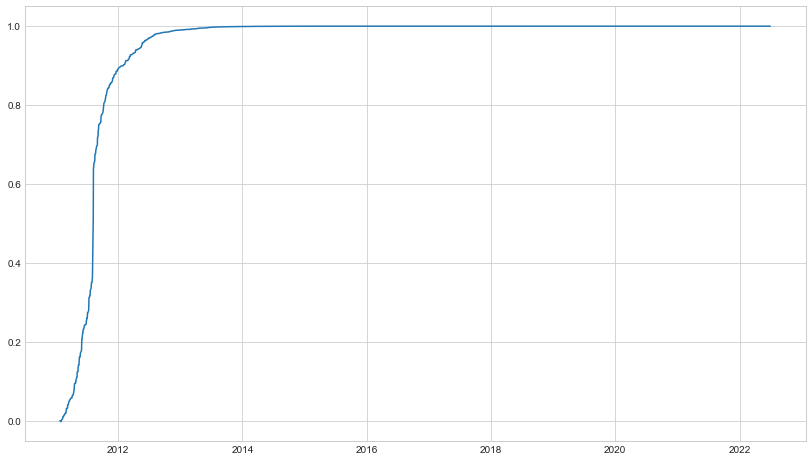

In [148]:
plt.figure(figsize = (14,8))
plt.plot(df_pct.index, state_means[:,0], label = "Coeficiente")

In [159]:
delta = 1e-3
trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
obs_mat = np.expand_dims(np.vstack([[matrix['Ibovespa']], [np.ones(len(matrix['Ibovespa']))]]).T, axis=1)

kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                  initial_state_mean=[0,0],
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=2,
                  #transition_covariance=trans_cov
                  )

In [160]:
state_means, state_covs = kf.filter(matrix['Ibovespa'].values)


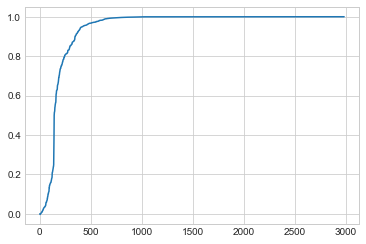

In [161]:
plt.plot(state_means[:,0])

In [142]:
matrix['AMER3']

Data
2011-01-25    0.000000
2011-01-26   -0.045426
2011-01-27   -0.031725
2011-01-28   -0.044369
2011-01-31    0.008929
                ...   
2022-06-24   -0.014358
2022-06-27    0.021850
2022-06-28   -0.043478
2022-06-29    0.001490
2022-06-30   -0.000744
Freq: B, Name: AMER3, Length: 2983, dtype: float64